<a href="https://colab.research.google.com/github/Herawisp/Scientific_Computing_LAB/blob/main/SC_Sesi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Catatan

In [4]:
from scipy.interpolate import interp1d # function interpolasi
from scipy.interpolate import CubicSpline # function cubic spline
import numpy as np # function operasi numerik
import matplotlib.pyplot as plt # untuk membuat grafik
plt.style.use('ggplot') # style gambar grafik

Linear Interpolasi

In [5]:
x = [0, 1, 2]
y = [1, 3, 2]

In [6]:
f = interp1d(x, y)
y_ask = f(1.5)
print(y_ask)

2.5


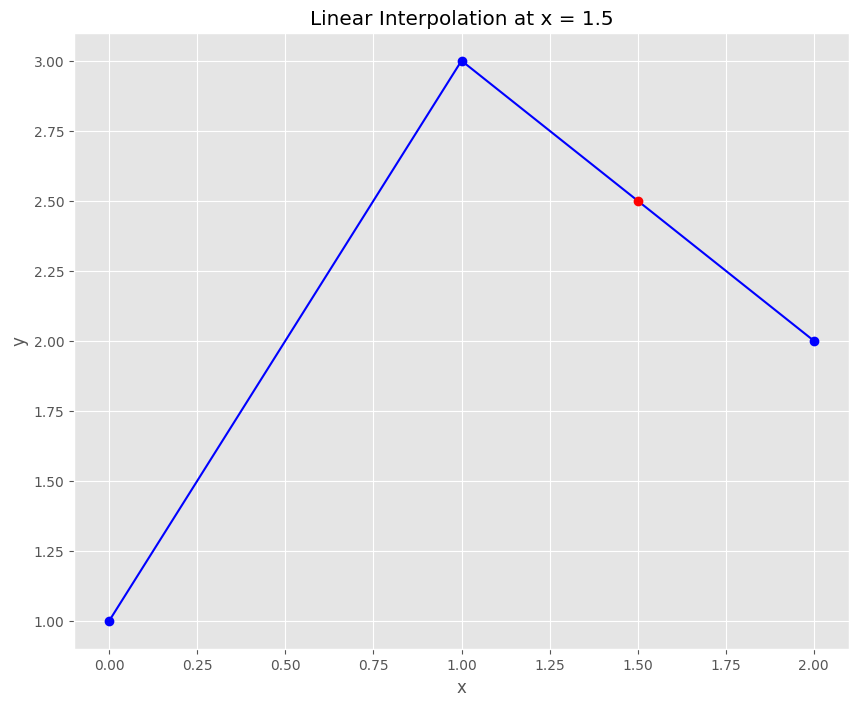

In [7]:
plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_ask, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Linear Interpolation

In [8]:
x = [0, 1, 2, 3, 4, 5]
y = [1, 3, 3, 5, 2, 2]

In [9]:
f = interp1d(x, y)

x_lin = np.linspace(0, 5, 100) # Membuat 100 nilai yang tersebar merata antara 0 hingga 5
y_lin = f(x_lin) # Menghitung nilai y untuk Semua x Baru

y_ask = f(3.1)
print(y_ask)

4.699999999999999


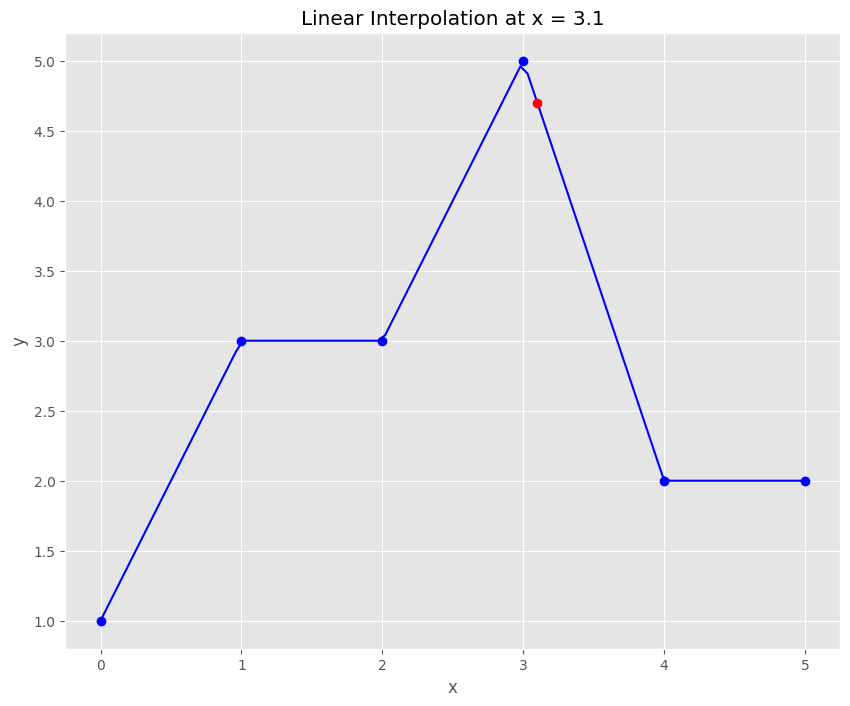

In [10]:
plt.figure(figsize = (10,8))
plt.plot(x, y, 'ob')
plt.plot(x_lin, y_lin, 'b')
plt.plot(3.1, y_ask, 'ro')
plt.title('Linear Interpolation at x = 3.1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Newton interpolation

In [11]:
%matplotlib inline
def divided_diff(x, y):
  '''
  function to calculate the divided
  differences table
  '''

  n = len(y)
  coef = np.zeros([n, n])
  # the first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):
  n = len(x_data) - 1
  p = coef[n-1]

  for k in range (1, n+1):
    p = coef[n-k] + (x - x_data[n-k]) * p
  return p

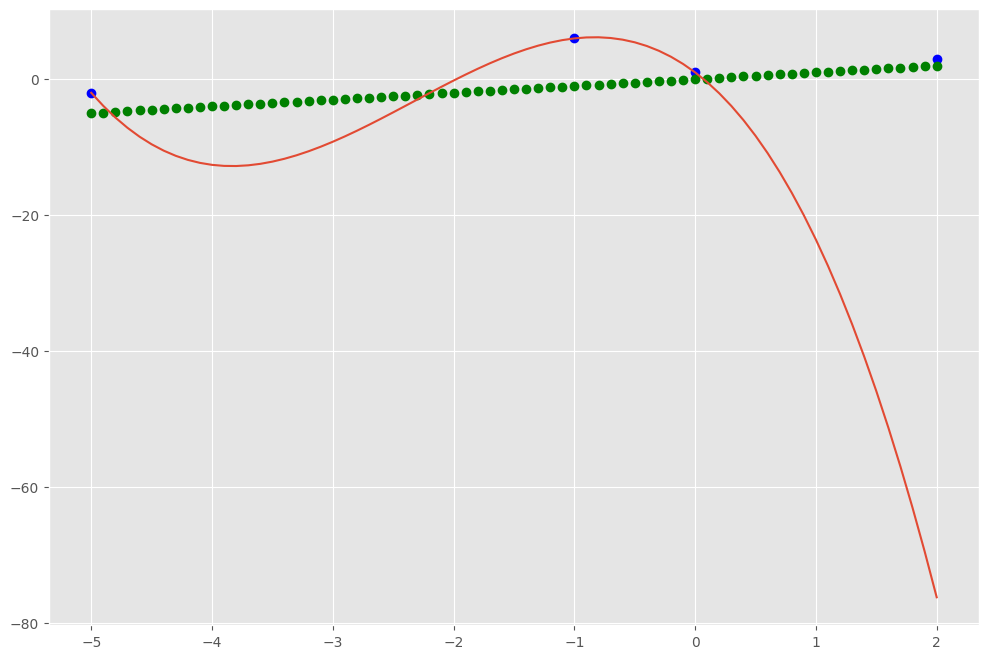

In [12]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12,8))
plt.plot(x, y, 'bo')
plt.plot(x_new, x_new, 'go')
plt.plot(x_new, y_new)
plt.show()

# Modul

Olimpiade 2006, Juara lomba sprint 100m adalah Ben. Catatan larinya ketika 0 detik, kecepatannya 10m/detik. Pada saat 5 meter, kecepatannya 15m/detik. Pada saat 10 meter, kecepatannya adalah 20m/detik. Berapa kecepatan larinya saat pada jarak 7.2m?

Jawab dengan coding phyton linear interpolation, serttakan plot grafik!



In [2]:
import numpy as np
import matplotlib.pyplot as plt

jarak = np.array([0, 5, 10])
kecepatan = np.array([10, 15, 20])
target = np.interp(7.2, jarak, kecepatan)

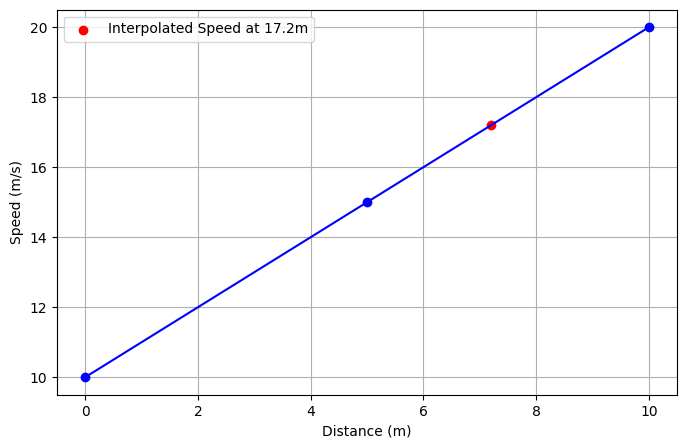

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(jarak, kecepatan, 'bo-')
plt.scatter(7.2, target, color='red', label=f"Interpolated Speed at {target}m")
plt.xlabel("Distance (m)")
plt.ylabel("Speed (m/s)")
plt.legend()
plt.grid(True)
plt.show()
